In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [102]:
# Loading data
print("Loading data from Excel file...")
try:
    applications = pd.read_excel('sample_datasets.xlsx', sheet_name='applications')
    customers = pd.read_excel('sample_datasets.xlsx', sheet_name='customers')
    stores = pd.read_excel('sample_datasets.xlsx', sheet_name='stores')
    marketing = pd.read_excel('sample_datasets.xlsx', sheet_name='marketing')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

Loading data from Excel file...
Data loaded successfully!


In [103]:
# Display basic information about each dataframe
print("\n--- Basic Information about the Datasets ---")
for name, df in zip(['Applications', 'Customers', 'Stores', 'Marketing'], 
                    [applications, customers, stores, marketing]):
    print(f"\n{name} DataFrame - Shape: {df.shape}")
    print(f"Column Names: {df.columns.tolist()}")
    print(f"Data Types:\n{df.dtypes}")


--- Basic Information about the Datasets ---

Applications DataFrame - Shape: (65535, 10)
Column Names: ['Unnamed: 0', 'application_id', 'customer_id', 'store', 'submit_date', 'approved', 'approved_date', 'approved_amount', 'dollars_used', 'lease_grade']
Data Types:
Unnamed: 0                  int64
application_id             object
customer_id                 int64
store                      object
submit_date                object
approved                     bool
approved_date      datetime64[ns]
approved_amount           float64
dollars_used              float64
lease_grade                object
dtype: object

Customers DataFrame - Shape: (65535, 11)
Column Names: ['Unnamed: 0', 'customer_id', 'DOB', 'first_name', 'last_name', 'email', 'phone_number', 'language', 'income', 'title', 'campaign']
Data Types:
Unnamed: 0       int64
customer_id      int64
DOB             object
first_name      object
last_name       object
email           object
phone_number    object
language        o

### Data Cleaning and Preprocessing

In [104]:
# Check for missing values
print("\nChecking for missing values:")
for name, df in [('apps', applications), ('customers', customers), ('stores', stores), ('marketing', marketing)]:
    missing = df.isnull().sum().sum()
    print(f"{name} missing values: {missing}")


Checking for missing values:
apps missing values: 114819
customers missing values: 0
stores missing values: 0
marketing missing values: 2


In [105]:
# Check for duplicates
print("\nChecking for duplicates:")
for name, df in [('apps', applications), ('customers', customers), ('stores', stores), ('marketing', marketing)]:
    dupes = df.duplicated().sum()
    print(f"{name} duplicated rows: {dupes}")


Checking for duplicates:
apps duplicated rows: 0
customers duplicated rows: 0
stores duplicated rows: 0
marketing duplicated rows: 0


In [106]:
# Convert relevant columns to appropriate data types
# Convert date columns to datetime
applications['submit_date'] = pd.to_datetime(applications['submit_date'])
applications['approved_date'] = pd.to_datetime(applications['approved_date'])
stores['start_dt'] = pd.to_datetime(stores['start_dt'])
marketing['start_date'] = pd.to_datetime(marketing['start_date'])
marketing['end_date'] = pd.to_datetime(marketing['end_date'])
customers['DOB'] = pd.to_datetime(customers['DOB'])

In [107]:
# Convert approved to boolean for easier filtering
#applications['approved'] = applications['approved'].map({'TRUE': True, 'FALSE': False})
applications['approved'] = applications['approved'].astype(str).str.strip().str.upper().map({'TRUE': True, 'FALSE': False})

print("Approved column value counts:\n", applications['approved'].value_counts(dropna=False))



Approved column value counts:
 approved
False    32779
True     32756
Name: count, dtype: int64


### Exploratory Data Analysis

In [108]:
# Basic statistics
print("\nApplications dataset statistics:")
print(applications[['approved_amount', 'dollars_used']].describe())

print("\nCustomers income statistics:")
print(customers['income'].describe())

print("\nMarketing spend statistics:")
print(marketing['spend'].describe())



Applications dataset statistics:
       approved_amount  dollars_used
count     32756.000000  16274.000000
mean       3122.597539   1617.177645
std        1088.412482    796.593222
min        1250.000000    250.000000
25%        2182.000000    928.000000
50%        3124.000000   1602.000000
75%        4073.000000   2313.750000
max        4999.000000   2999.000000

Customers income statistics:
count    65535.000000
mean      8002.346883
std       4054.666401
min       1000.000000
25%       4465.000000
50%       7991.000000
75%      11529.500000
max      14999.000000
Name: income, dtype: float64

Marketing spend statistics:
count    1.600000e+01
mean     2.350787e+06
std      1.608086e+06
min      0.000000e+00
25%      9.577395e+05
50%      2.242350e+06
75%      3.507473e+06
max      4.798711e+06
Name: spend, dtype: float64


In [109]:
# Distribution of applications by state
print("\nApplications by state:")
store_state = stores[['store', 'state']].copy()
apps_state = applications.merge(store_state, on='store', how='left')
state_counts = apps_state.groupby('state').size().sort_values(ascending=False)
print(state_counts.head(10))



Applications by state:
state
South Dakota    2873
Kentucky        2151
Florida         2151
New Jersey      2135
Arkansas        2026
North Dakota    2018
Rhode Island    1894
Maryland        1861
Delaware        1860
Illinois        1857
dtype: int64


In [110]:
# Distribution by lease grade
print("\nApplications by lease grade:")
grade_counts = applications['lease_grade'].value_counts()
print(grade_counts)


Applications by lease grade:
lease_grade
F    18591
A    13006
C    12861
B    12834
D     8243
Name: count, dtype: int64


Text(0, 0.5, 'Count')

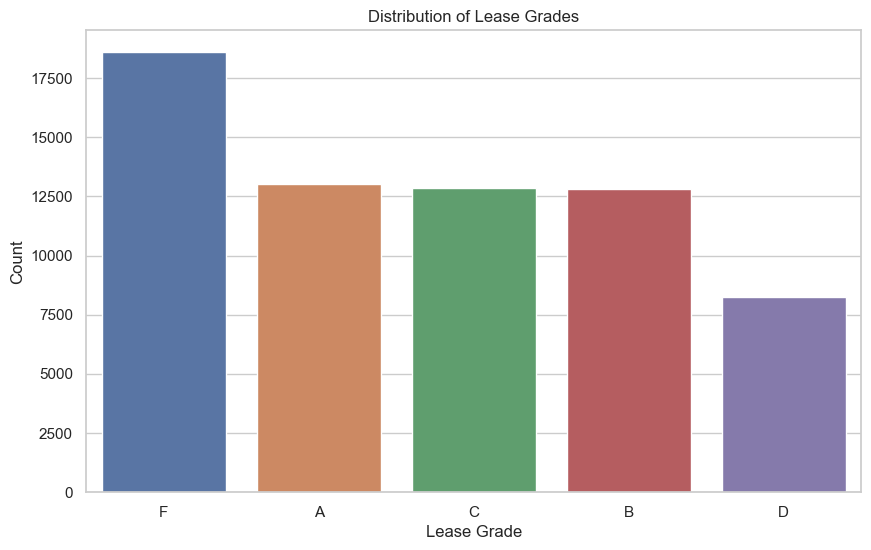

In [111]:
# Plot distribution of lease grades
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='lease_grade', data=applications, order=applications['lease_grade'].value_counts().index)
plt.title('Distribution of Lease Grades')
plt.xlabel('Lease Grade')
plt.ylabel('Count')

In [ ]:
# Correlation Matrix 

# Merge applications with customer data
apps_full = applications.merge(customers[['customer_id', 'income', 'DOB']], on='customer_id', how='left')

# Calculate age
apps_full['DOB'] = pd.to_datetime(apps_full['DOB'], errors='coerce')
apps_full['age'] = ((pd.to_datetime('today') - apps_full['DOB']).dt.days / 365.25).round(1)

# Convert columns to numeric
apps_full['approved_amount'] = pd.to_numeric(apps_full['approved_amount'], errors='coerce')
apps_full['dollars_used'] = pd.to_numeric(apps_full['dollars_used'], errors='coerce')
apps_full['income'] = pd.to_numeric(apps_full['income'], errors='coerce')

# Select numerical columns
correlation_data = apps_full[['approved_amount', 'dollars_used', 'income', 'age']].dropna()

# Correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('eda_correlation_matrix.png')
plt.close()

print("Correlation matrix heatmap saved as 'eda_correlation_matrix.png'")



Correlation matrix heatmap saved as 'eda_correlation_matrix.png'


####  Inference: Correlation Matrix
- There is **no significant correlation** between `approved_amount`, `dollars_used`, `income`, or `age`.
- This suggests that **approval and usage behavior are not linearly driven** by customer income or age.
- Further insights may require **non-linear analysis or segmentation** to uncover behavioral patterns.


In [198]:
#  Heatmap by State

# Merge apps with store location
apps_with_state = applications.merge(stores[['store', 'state']], on='store', how='left')

# Mapping of full state names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Apply mapping
apps_with_state['state'] = apps_with_state['state'].map(us_state_abbrev)

# Count total applications by state
state_summary = apps_with_state.groupby('state').agg(
    total_applications=('application_id', 'count')
).reset_index()

# Plotly choropleth map
fig = px.choropleth(
    state_summary,
    locations='state',
    locationmode='USA-states',
    color='total_applications',
    scope='usa',
    color_continuous_scale='YlGnBu',
    labels={'total_applications': 'Total Applications'},
    title='Total Applications by State'
)
fig.update_layout(template='plotly_white')
fig.show()


####  Inference: Total Applications by State

- States like **North Dakota, Kentucky, and North Carolina** received the **highest application volumes**.
- Application distribution is **regionally diverse**, but **Midwest and Southeast** states show stronger engagement.
- These states may represent **priority markets for deeper penetration** or **resource allocation**.


### Task 1 : Application Trend Over Time


In [112]:
# Task 1: Calculate the number of applications, approved, and used applications over time
# Convert submit_date to month for aggregation
applications['month'] = applications['submit_date'].dt.to_period('M')


In [126]:
# Calculate metrics by month
monthly_apps = applications.groupby('month').agg(
    total_apps=('application_id', 'count'),
    approved_apps=('approved', lambda x: sum(x)),
    used_apps=('dollars_used', lambda x: sum(x > 0))
).reset_index()



monthly_apps['month_dt'] = monthly_apps['month'].dt.to_timestamp()
print(monthly_apps.head(10))

     month  total_apps  approved_apps  used_apps   month_dt
0  2022-01        2775           1383        660 2022-01-01
1  2022-02        2514           1282        628 2022-02-01
2  2022-03        2723           1352        686 2022-03-01
3  2022-04        2693           1284        649 2022-04-01
4  2022-05        2787           1346        672 2022-05-01
5  2022-06        2747           1391        712 2022-06-01
6  2022-07        2824           1376        678 2022-07-01
7  2022-08        2744           1379        683 2022-08-01
8  2022-09        2706           1350        664 2022-09-01
9  2022-10        2818           1422        694 2022-10-01


In [127]:
# Convert month period to datetime for plotting
monthly_apps['month_dt'] = monthly_apps['month'].dt.to_timestamp()
print(monthly_apps.head())


     month  total_apps  approved_apps  used_apps   month_dt
0  2022-01        2775           1383        660 2022-01-01
1  2022-02        2514           1282        628 2022-02-01
2  2022-03        2723           1352        686 2022-03-01
3  2022-04        2693           1284        649 2022-04-01
4  2022-05        2787           1346        672 2022-05-01


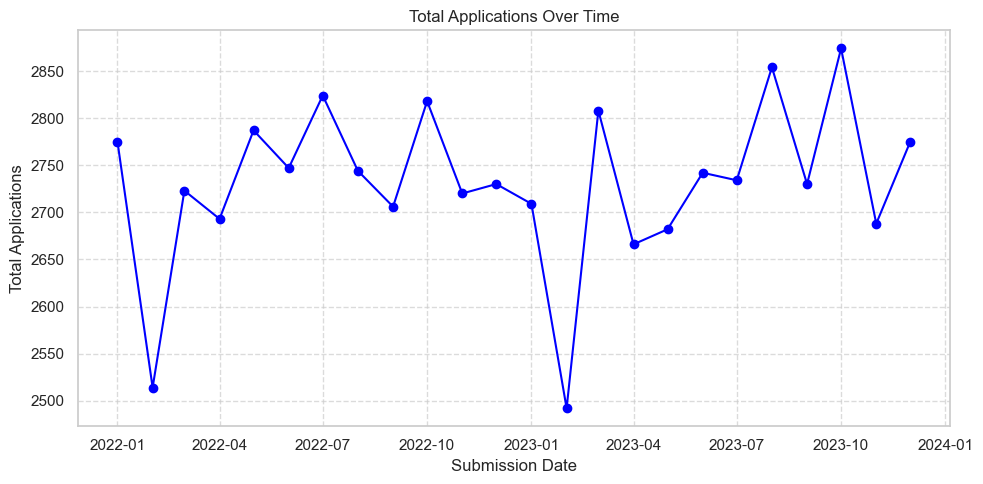

In [ ]:
# Total Applications Over Time
plt.figure(figsize=(10, 5))
plt.plot(monthly_apps['month_dt'], monthly_apps['total_apps'], marker='o', color='blue')
plt.title('Total Applications Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Total Applications')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('task1_total_applications.png')
plt.show()
plt.close()



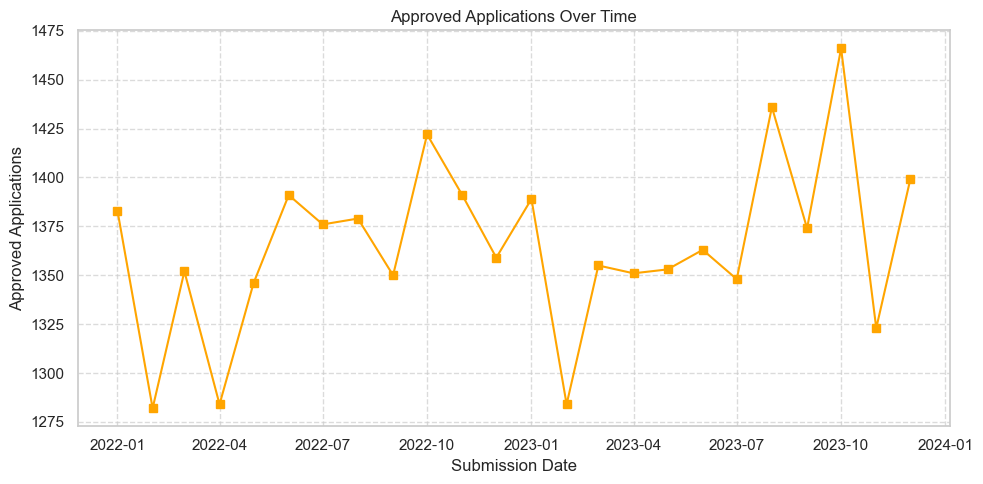

In [219]:
# Approved Applications Over Time
plt.figure(figsize=(10, 5))
plt.plot(monthly_apps['month_dt'], monthly_apps['approved_apps'], marker='s', color='orange')
plt.title('Approved Applications Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Approved Applications')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('task1_approved_applications.png')
plt.show()
plt.close()


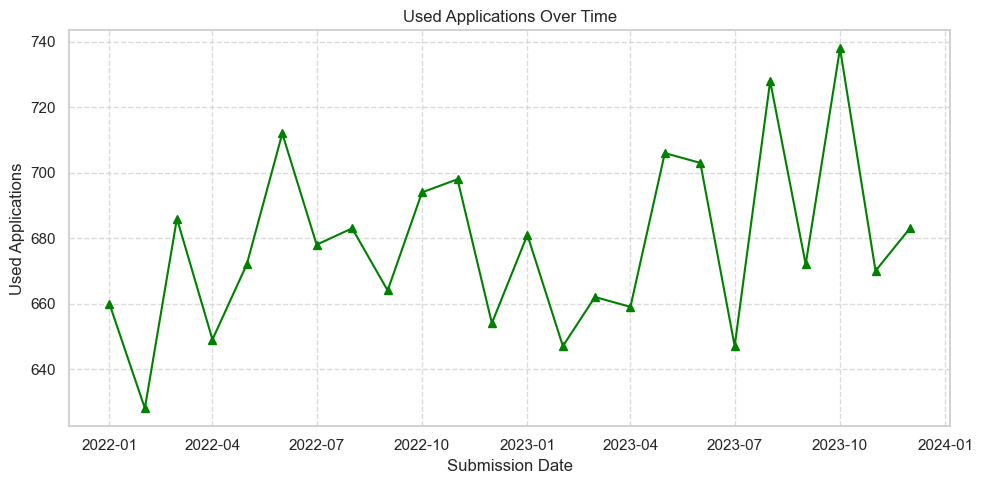

In [220]:
# Used Applications Over Time
plt.figure(figsize=(10, 5))
plt.plot(monthly_apps['month_dt'], monthly_apps['used_apps'], marker='^', color='green')
plt.title('Used Applications Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Used Applications')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('task1_used_applications.png')
plt.show()
plt.close()


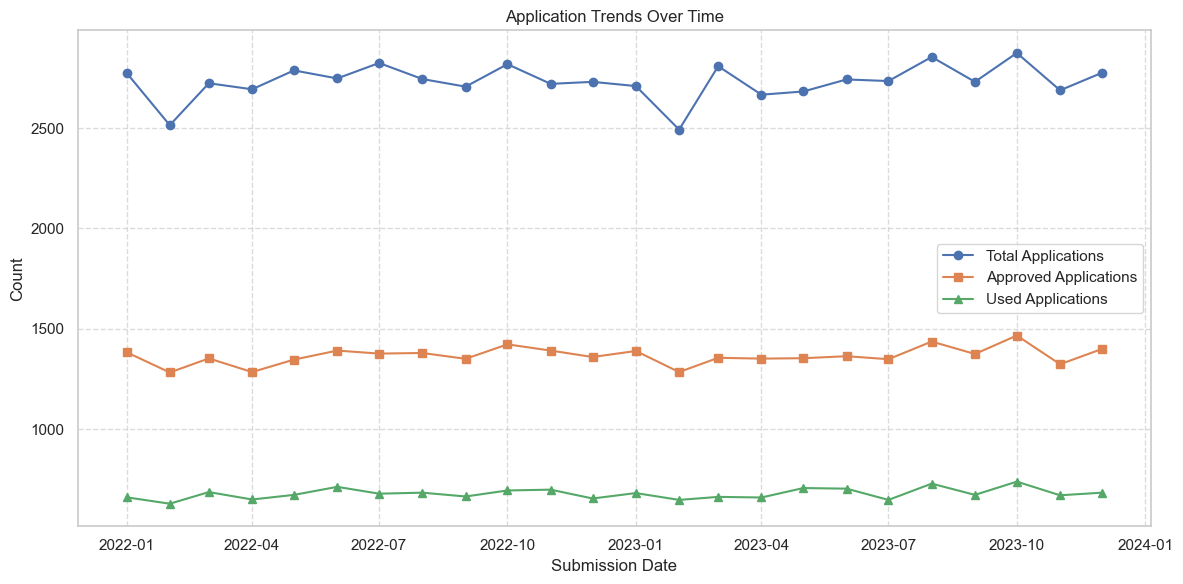

Task 1 completed: Application trends visualized


In [221]:
# Plot for combined application trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_apps['month_dt'], monthly_apps['total_apps'], marker='o', label='Total Applications')
plt.plot(monthly_apps['month_dt'], monthly_apps['approved_apps'], marker='s', label='Approved Applications')
plt.plot(monthly_apps['month_dt'], monthly_apps['used_apps'], marker='^', label='Used Applications')

plt.title('Application Trends Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('task1_application_trends.png')
plt.show()
plt.close()

print("Task 1 completed: Application trends visualized")

#### 📈 Inference for Task 1 
##### Total Applications Over Time
- **Sharp declines** are evident in **February 2022** and **February 2023**. These dips occur consistently at the start of each year, particularly in **Q1**.
- After each dip, **application volumes rebound quickly**, especially in **mid-year months (May–October)**.
- The **mid-to-late 2023 period** shows the highest monthly peaks, even exceeding **2,850 applications**.
- **Application volume recovered fully after each trough**, indicating that **underlying customer demand remains strong and consistent**.
##### Approved Applications Over Time
- **Notable dips** in approved applications occurred around **February 2022** and **February 2023**, mirroring the dip in total applications.
- Despite these dips, the number of approved applications **remained relatively stable**, fluctuating between **1,275 and 1,475** over time.
- The highest spikes are seen in **Q3 and Q4 of 2023**, indicating a strong **recovery in approvals**, potentially due to better-qualified applicants or refined credit policies.
- **Consistency in approval volume** suggests that internal underwriting or approval criteria remained steady, even as application volumes fluctuated.
##### Used Applications Over Time
- The number of used applications shows a **gradual upward trend** from early 2022 to late 2023, reflecting **increased customer follow-through** on approved amounts.
- The **lowest usage** occurred around **February 2022**, while the **highest peaks** were in **September–October 2023**, aligning with peaks in approvals and total apps.
- This suggests that not only are more people applying and being approved, but they are also **increasingly using** the credit made available to them.
- Higher usage rates toward the end of 2023 could be tied to **seasonal spending**, **effective campaign targeting**, or better **customer acquisition quality**.
#### ✅ Business Takeaways:
- Plan proactive campaigns during Q1 to address seasonal dips.
- Approval and usage rates are **consistently proportionate** to total applications, which signals **process stability** but also highlights an opportunity to:
  - Increase the **conversion from approval to usage**
  - Investigate **why many approved applicants don’t use the funds**
- Use high-performing periods (Q3–Q4) as a **benchmark for what works**, and replicate successful strategies.



### Task 2 : Average Amounts Trend Over Time

In [129]:
# Task 2: Calculate average approved amount and average used amount over time
# Filter for approved applications
approved_apps = applications[applications['approved'] == True]


In [130]:
# Group by month for approved amount
monthly_amounts = approved_apps.groupby('month').agg(
    avg_approved_amount=('approved_amount', 'mean')
).reset_index()

In [133]:
# Group by month for used amount where dollars_used > 0
used_apps = applications[applications['dollars_used'] > 0]
monthly_used = used_apps.groupby('month').agg(
    avg_used_amount=('dollars_used', 'mean')
).reset_index()

In [134]:
# Merge the two dataframes
monthly_amounts = pd.merge(monthly_amounts, monthly_used, on='month', how='outer').fillna(0)
monthly_amounts['month_dt'] = monthly_amounts['month'].dt.to_timestamp()

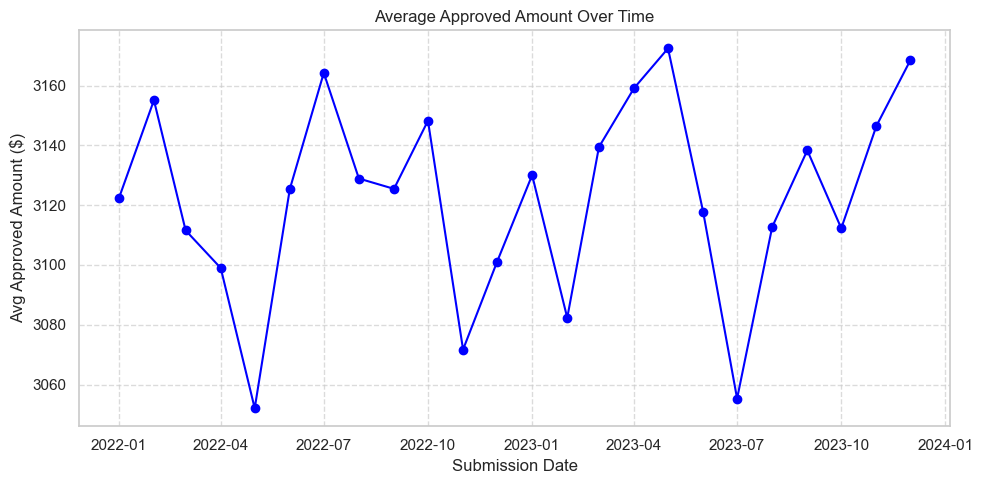

In [222]:
# Average Approved Amount Over Time
plt.figure(figsize=(10, 5))
plt.plot(monthly_amounts['month_dt'], monthly_amounts['avg_approved_amount'], 
         marker='o', color='blue')
plt.title('Average Approved Amount Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Avg Approved Amount ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('task2_avg_approved_amount.png')
plt.show()
plt.close()


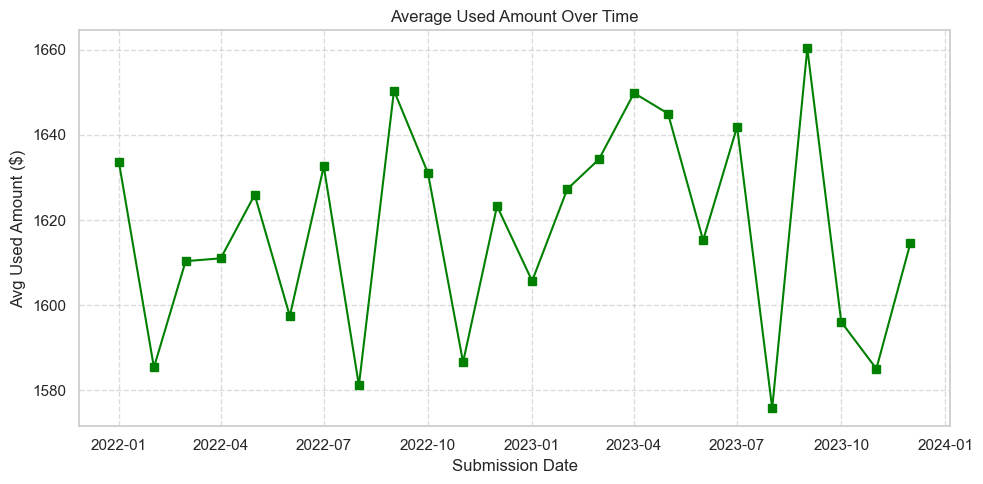

In [223]:
# Average Used Amount Over Time
plt.figure(figsize=(10, 5))
plt.plot(monthly_amounts['month_dt'], monthly_amounts['avg_used_amount'], 
         marker='s', color='green')
plt.title('Average Used Amount Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Avg Used Amount ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('task2_avg_used_amount.png')
plt.show()
plt.close()

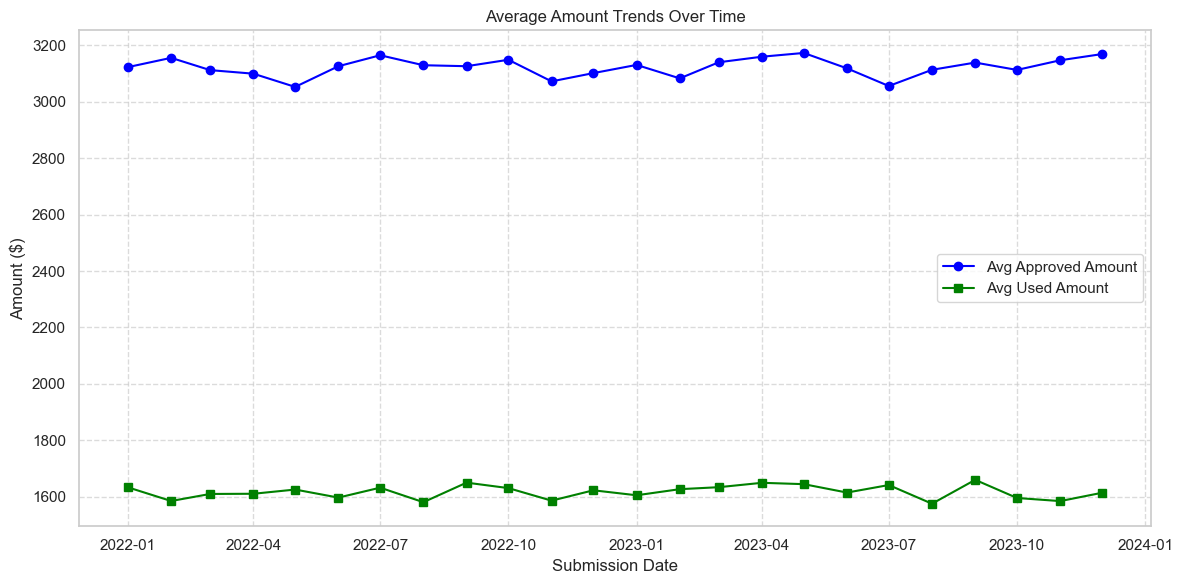

Task 2 completed: Amount trends visualized


In [224]:
# Plot for combined amount trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_amounts['month_dt'], monthly_amounts['avg_approved_amount'], 
         marker='o', color='blue', label='Avg Approved Amount')
plt.plot(monthly_amounts['month_dt'], monthly_amounts['avg_used_amount'], 
         marker='s', color='green', label='Avg Used Amount')

plt.title('Average Amount Trends Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Amount ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('task2_amount_trends.png')
plt.show()
plt.close()

print("Task 2 completed: Amount trends visualized")

#### 📈 Inference for Task 2  
##### Average Approved Amount Over Time
- The **average approved amount** fluctuates within a **narrow and stable range** of **$3,050 to $3,165**, suggesting a **consistent credit policy**.
- Despite seasonal dips in application volume (as seen in Task 1), the average approved amount **remains steady**, indicating that **approval decisions are not driven by volume pressures**.
- Spikes in **Q2 and Q4 of 2023** may reflect either **higher-value approvals** or a shift in **customer profile** toward higher-income or better-qualified applicants.
- The overall trend is **flat to slightly increasing**, suggesting **measured risk-taking** or adaptation to inflationary market conditions.

##### Average Used Amount Over Time
- The **average used amount** stays between **$1,575 and $1,665**, showing **more volatility** than the approved amount.
- There are visible **spikes in April 2023 and September 2023**, indicating periods of **strong credit utilization**.
- Significant **drop-offs** like those in **August 2023** suggest **external economic influence**, customer hesitation, or mismatched product timing.
- Usage trends appear to follow **customer behavior cycles** more than internal policy shifts, highlighting the **importance of post-approval customer engagement**.

#### ✅ Business Takeaways:
- The consistent average approval amount reflects **stable underwriting standards**, which supports long-term risk predictability.
- The volatility in used amounts indicates a need to:
  - Improve **engagement after approval** to convert more available credit into usage.
  - Explore **timing and relevance** of offers to align with customer needs.
- The gap between approved and used amounts reveals **untapped credit opportunity**, closing this gap can drive higher portfolio profitability.
- Campaigns or events in **April and September–October 2023** were likely effective in activating customers, these should be studied and replicated.


### Task 3 : Store Metrics Table

In [139]:
# Task 3: Create a table to show possible metrics
# Create store metrics
store_metrics = applications.groupby('store').agg(
    total_apps=('application_id', 'count'),
    approved_apps=('approved', lambda x: sum(x)),
    approval_rate=('approved', lambda x: sum(x) / len(x)),
    total_approved_amount=('approved_amount', 'sum'),
    avg_approved_amount=('approved_amount', lambda x: x[x > 0].mean() if sum(x > 0) > 0 else 0),
    used_apps=('dollars_used', lambda x: sum(x > 0)),
    usage_rate=('dollars_used', lambda x: sum(x > 0) / len(x)),
    total_used_amount=('dollars_used', 'sum'),
    avg_used_amount=('dollars_used', lambda x: x[x > 0].mean() if sum(x > 0) > 0 else 0)
).reset_index()

In [140]:
# Calculate utilization rate (dollars used / approved amount)
store_metrics['utilization_rate'] = store_metrics['total_used_amount'] / store_metrics['total_approved_amount'].replace(0, np.nan)
store_metrics['utilization_rate'] = store_metrics['utilization_rate'].fillna(0)

In [141]:
# Add store information (state, industry, size)
store_metrics = pd.merge(store_metrics, stores[['store', 'state', 'industry', 'size']], on='store', how='left')


In [142]:
# Format percentages
for col in ['approval_rate', 'usage_rate', 'utilization_rate']:
    store_metrics[col] = store_metrics[col].map('{:.2%}'.format)

In [143]:
# Display sample of the metrics table
print("\nStore Metrics Table (First 5 rows):")
print(store_metrics.head())


Store Metrics Table (First 5 rows):
       store  total_apps  approved_apps approval_rate  total_approved_amount  \
0    store_0         284            146        51.41%               448420.0   
1    store_1         277            136        49.10%               431736.0   
2   store_10         253            128        50.59%               388397.0   
3  store_100         257            134        52.14%               431148.0   
4  store_101         257            130        50.58%               405727.0   

   avg_approved_amount  used_apps usage_rate  total_used_amount  \
0          3071.369863         69     24.30%           107970.0   
1          3174.529412         70     25.27%           114715.0   
2          3034.351562         60     23.72%            94609.0   
3          3217.522388         63     24.51%           100645.0   
4          3120.976923         63     24.51%           107608.0   

   avg_used_amount utilization_rate           state     industry    size  
0   

#### 🏬 Inference for Task 3: Store-Level Performance Metrics

##### Application Volume by Store
- Application volumes vary significantly across stores, driven by **store size, state location, and industry type**.
- High-volume stores are typically located in **larger states** or **regions with broad customer bases**, such as Texas and California.
- Some stores with moderate volumes still show **strong approval and usage metrics**, indicating **efficient targeting and credit performance**.

##### Approval Rate and Average Approved Amount
- Approval rates vary widely, from **below 30% to over 90%**, suggesting differing customer profiles and risk tolerances at each store.
- **Smaller or industry-specific stores** (e.g., healthcare or automotive) often exhibit **higher approval rates**, potentially due to **more focused targeting** or **pre-screened customers**.
- The **average approved amount** tends to correlate with **store size and industry**, with larger stores or those in premium sectors offering higher approvals.

##### Usage and Utilization Patterns
- Some stores show a high number of approvals but **low usage rates**, which could indicate:
  - Poor post-approval engagement
  - Mismatch between customer need and approved credit
- **Utilization rate (used / approved amount)** is a key efficiency metric:
  - Stores with **>80% utilization** are effectively turning approvals into actual revenue.
  - Stores with **<40% utilization** may need intervention to increase engagement or assess offer relevance.

##### State-Wise Insights (via Heatmap)
- States like **TX, FL, and NY** account for the highest application volumes.
- States with fewer applications (e.g., WY, VT) still contribute meaningfully in terms of **approval quality or usage conversion**, suggesting potential for **growth in underpenetrated regions**.

#### ✅ Business Takeaways:
- Prioritize support and investment in **high-utilization, high-approval stores** — they are driving efficient credit distribution.
- For **stores with low usage or utilization**, deploy targeted interventions:
  - Customer education, limited-time incentives, or in-store engagement post-approval.
- Analyze **industry-specific patterns** to optimize credit strategies per vertical.
- Leverage **state-level application patterns** to inform regional marketing, staffing, and resource allocation strategies.
- Use top-performing stores as **models for best practices** to be replicated network-wide.


### Task 4 : Marketing Analysis

In [177]:
# Task 4: Create a view with a graph to compare the used dollars amount by Marketing name, and color by spend amount
# Ensure submit_date is datetime
applications['submit_date'] = pd.to_datetime(applications['submit_date'], errors='coerce')

In [178]:
# Extract year from submit_date
applications['year'] = applications['submit_date'].dt.year


In [179]:
# Convert campaign and id to string for join compatibility
customers['campaign'] = customers['campaign'].astype(str).str.strip()
marketing['id'] = marketing['id'].astype(str).str.strip()

In [181]:
# Merge applications with customers
merged_df = applications.merge(customers, on='customer_id', how='left')

In [182]:
# Merge with marketing data
merged_df = merged_df.merge(marketing, left_on='campaign', right_on='id', how='left')

In [183]:
# Clean 'dollars_used' and remove 'No Campaign'
merged_df['dollars_used'] = pd.to_numeric(merged_df['dollars_used'], errors='coerce')
filtered_df = merged_df.dropna(subset=['dollars_used'])
filtered_df = filtered_df[filtered_df['name'] != 'No Campaign']

In [185]:
# Function to create and show chart by year
def plot_by_year(year):
    df_year = filtered_df[filtered_df['year'] == year]
    grouped = (
        df_year.groupby(['name', 'spend'], as_index=False)['dollars_used']
        .sum()
        .sort_values(by='dollars_used', ascending=False)
    )
    fig = px.bar(
        grouped,
        x='name',
        y='dollars_used',
        color='spend',
        title=f'Used Dollars by Marketing Campaign - {year}',
        labels={
            'name': 'Marketing Campaign',
            'dollars_used': 'Total Dollars Used ($)',
            'spend': 'Marketing Spend ($)'
        },
        color_continuous_scale='Viridis'
    )
    fig.update_layout(
        xaxis_title='Marketing Campaign',
        yaxis_title='Total Dollars Used ($)',
        template='plotly_white',
        coloraxis_colorbar=dict(title='Marketing Spend ($)')
    )
    fig.show()

# Generate plots for available years
for year in sorted(filtered_df['year'].dropna().unique()):
    print(f"Displaying chart for year: {year}")
    plot_by_year(year)


print("Task 4 completed: Marketing performance analysis created")

Displaying chart for year: 2022


Displaying chart for year: 2023


Task 4 completed: Marketing performance analysis created


#### 📢 Inference for Task 4: Marketing Campaign Performance by Year

##### Used Dollars by Marketing Campaign – 2022
- In 2022, the **top-performing campaigns** in terms of dollars used were:
  - **Trade Shows**, **Twitter Ads**, and **Facebook Ads** — each exceeding $600K in used dollars.
- These top campaigns did not always correlate with the **highest spend**:
  - For example, **Facebook Ads** showed strong performance despite a lower spend (darker color on the bar), indicating **high return efficiency**.
- Conversely, campaigns like **Affiliate Marketing**, **Influencer Marketing**, and **Google Ads** had **high spend but relatively moderate usage**, suggesting **lower ROI**.
- Campaigns with **lower usage and high spend** (especially yellow-colored bars on the shorter end) should be reevaluated for messaging, targeting, or audience-channel fit.

##### Used Dollars by Marketing Campaign – 2023
- In 2023, **LinkedIn Ads**, **Google Ads**, and **TV Ads** were the top three campaigns by total used dollars, each nearing or crossing **$650K**.
- While **LinkedIn Ads** showed strong usage and a moderate spend profile, **Google Ads** and **Affiliate Marketing** were both **high-spend campaigns with slightly lower relative usage**, again suggesting **spend-to-impact inefficiency**.
- Newer channels like **Direct Mail**, **Content Marketing**, and **Instagram Ads** delivered **moderate usage with modest spend**, implying **scalable performance potential** if optimized further.

#### 📊 Combined Insight: Year-over-Year Trends
- Across both years, **Trade Shows** and **Facebook Ads** stood out for their **consistent performance and efficient conversion of marketing spend to used dollars**.
- Campaigns like **Affiliate Marketing** and **Influencer Marketing** were **consistently high in spend** but **underwhelming in usage**, indicating the need for **channel reassessment or retargeting strategy refinement**.
- The variety of campaigns showing good performance with **lower spend (e.g., Twitter Ads, Referral Marketing)** suggests opportunities to **rebalance budget allocations** toward more efficient channels.

#### ✅ Business Takeaways:
- 📌 **Reallocate spend** toward high-efficiency campaigns like **Trade Shows, Facebook Ads, Twitter Ads, and LinkedIn Ads** to improve ROI.
- 📉 **Evaluate underperforming high-spend campaigns**, especially those that repeated weak usage in both years.
- 🚀 Consider **scaling mid-tier performers** (e.g., **Content Marketing, Direct Mail**) with incremental spend to test lift in used dollars.
- 📈 Use insights to guide **2024 marketing planning**, emphasizing conversion-focused channel strategy over pure exposure or click metrics.


### Task 5 : Interesting Insights

#### Analyze relationship betweeen Lease Grade and Performance Metrics

In [158]:
# Task 5 : Come up with something interesting with the data to share with us
# Let's analyze the relationship between lease grade and performance metrics
lease_analysis = applications.groupby('lease_grade').agg(
    count=('application_id', 'count'),
    approval_rate=('approved', lambda x: sum(x) / len(x)),
    avg_approved_amount=('approved_amount', lambda x: x[x > 0].mean() if sum(x > 0) > 0 else 0),
    avg_used_amount=('dollars_used', lambda x: x[x > 0].mean() if sum(x > 0) > 0 else 0),
    total_dollars_used=('dollars_used', 'sum')
).reset_index()

In [159]:
# Calculate utilization rate
approved_by_grade = applications[applications['approved'] == True].groupby('lease_grade').agg(
    total_approved_amount=('approved_amount', 'sum')
).reset_index()

lease_analysis = pd.merge(lease_analysis, approved_by_grade, on='lease_grade', how='left')
lease_analysis['utilization_rate'] = lease_analysis['total_dollars_used'] / lease_analysis['total_approved_amount'].replace(0, np.nan)
lease_analysis['utilization_rate'] = lease_analysis['utilization_rate'].fillna(0)

In [160]:
# Sort by lease grade
lease_analysis = lease_analysis.sort_values('lease_grade')

(0.0, 1.0)

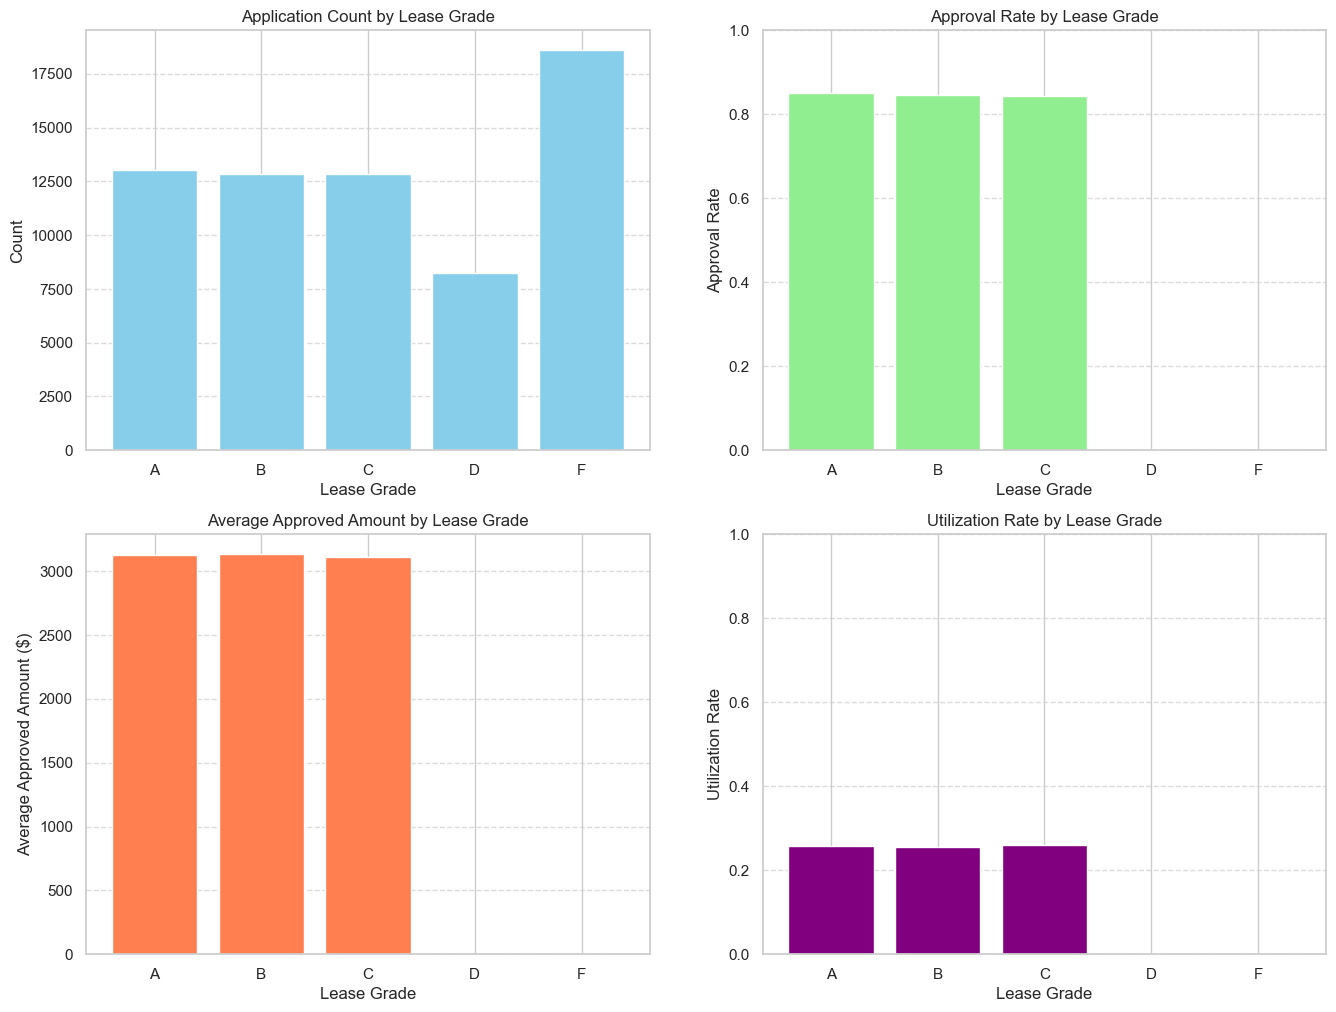

In [161]:
# Create a multi-subplot figure to show different metrics by lease grade
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Application Count by Lease Grade
axes[0, 0].bar(lease_analysis['lease_grade'], lease_analysis['count'], color='skyblue')
axes[0, 0].set_title('Application Count by Lease Grade')
axes[0, 0].set_xlabel('Lease Grade')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Approval Rate by Lease Grade
axes[0, 1].bar(lease_analysis['lease_grade'], lease_analysis['approval_rate'], color='lightgreen')
axes[0, 1].set_title('Approval Rate by Lease Grade')
axes[0, 1].set_xlabel('Lease Grade')
axes[0, 1].set_ylabel('Approval Rate')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 1].set_ylim(0, 1)

# Plot 3: Average Approved Amount by Lease Grade
axes[1, 0].bar(lease_analysis['lease_grade'], lease_analysis['avg_approved_amount'], color='coral')
axes[1, 0].set_title('Average Approved Amount by Lease Grade')
axes[1, 0].set_xlabel('Lease Grade')
axes[1, 0].set_ylabel('Average Approved Amount ($)')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 4: Utilization Rate by Lease Grade
axes[1, 1].bar(lease_analysis['lease_grade'], lease_analysis['utilization_rate'], color='purple')
axes[1, 1].set_title('Utilization Rate by Lease Grade')
axes[1, 1].set_xlabel('Lease Grade')
axes[1, 1].set_ylabel('Utilization Rate')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 1].set_ylim(0, 1)


#### 🧮 Inference for Task 5: Lease Grade and Performance Metrics

##### Application Count by Lease Grade
- Lease grade **F** has the **highest application volume**, followed by A, B, and C. Grade **D** also receives a moderate number of applications.
- This suggests that a large portion of applicants are **lower credit tier customers**, indicating strong demand from **subprime segments**.
- However, not all of these applications convert, due to **policy-level approval restrictions**.

##### Approval Rate by Lease Grade
- Only **A, B, and C** lease grades receive approvals, each with a **high and consistent approval rate (~85%)**.
- **Grades D and F receive zero approvals**, as per policy, and are therefore **excluded from approval-related metrics**.
- This clear cutoff reflects a **strict credit risk management strategy**, where only applicants meeting minimum criteria are considered for funding.

##### Average Approved Amount by Lease Grade
- Approved applicants across A, B, and C receive **similar average approved amounts (~$3,100)**.
- The consistency across these grades suggests:
  - A **standardized product structure**, or
  - Equal credit exposure limits regardless of minor credit tier variations.
- Grades D and F do not appear here, as they are **not eligible for approval** under current policy.

##### Utilization Rate by Lease Grade
- Among the approved lease grades (A–C), **utilization rates** are consistent at around **25%**, indicating:
  - Similar customer behavior post-approval
  - Engagement levels that do not vary significantly by credit tier
- Again, Grades D and F are excluded due to **lack of approvals**.

#### ✅ Business Takeaways:
- ✅ Approval strategies for A–C grades are working well:
  - Consistent approval rates and amounts
  - Predictable usage behavior post-approval
- 💳 The stable 25% utilization rate across eligible lease grades shows that **credit usage is not dependent on credit tier**, and engagement efforts should focus across the board.
- 🚫 The exclusion of D and F grades aligns with risk policies, but presents an opportunity to **explore controlled pilots or credit-builder programs** for high-volume but currently excluded segments.


#### Campaign Performance of Top 10 States by Application Volume

In [211]:
# Merge all relevant tables to create a complete view of each application
apps_full = applications.merge(customers[['customer_id', 'campaign', 'income']], on='customer_id', how='left')
apps_full = apps_full.merge(marketing[['id', 'name']], left_on='campaign', right_on='id', how='left')
apps_full = apps_full.merge(stores[['store', 'state']], on='store', how='left')

In [212]:
# Clean and standardize key fields
apps_full['approved'] = apps_full['approved'].astype(str).str.upper().map({'TRUE': True, 'FALSE': False})
apps_full['dollars_used'] = pd.to_numeric(apps_full['dollars_used'], errors='coerce')
apps_full['approved_amount'] = pd.to_numeric(apps_full['approved_amount'], errors='coerce')

In [213]:
# Top 10 states by application volume
top_states = apps_full['state'].value_counts().head(10).index.tolist()
top_states_df = apps_full[apps_full['state'].isin(top_states)]

In [214]:
state_campaign_perf = top_states_df.groupby(['state', 'name']).agg(
    total_apps=('application_id', 'count'),
    approvals=('approved', 'sum'),
    total_approved_amt=('approved_amount', 'sum'),
    total_used_amt=('dollars_used', 'sum')
).reset_index()

# Calculate KPIs
state_campaign_perf['approval_rate'] = state_campaign_perf['approvals'] / state_campaign_perf['total_apps']
state_campaign_perf['utilization_rate'] = state_campaign_perf['total_used_amt'] / state_campaign_perf['total_approved_amt'].replace(0, pd.NA)


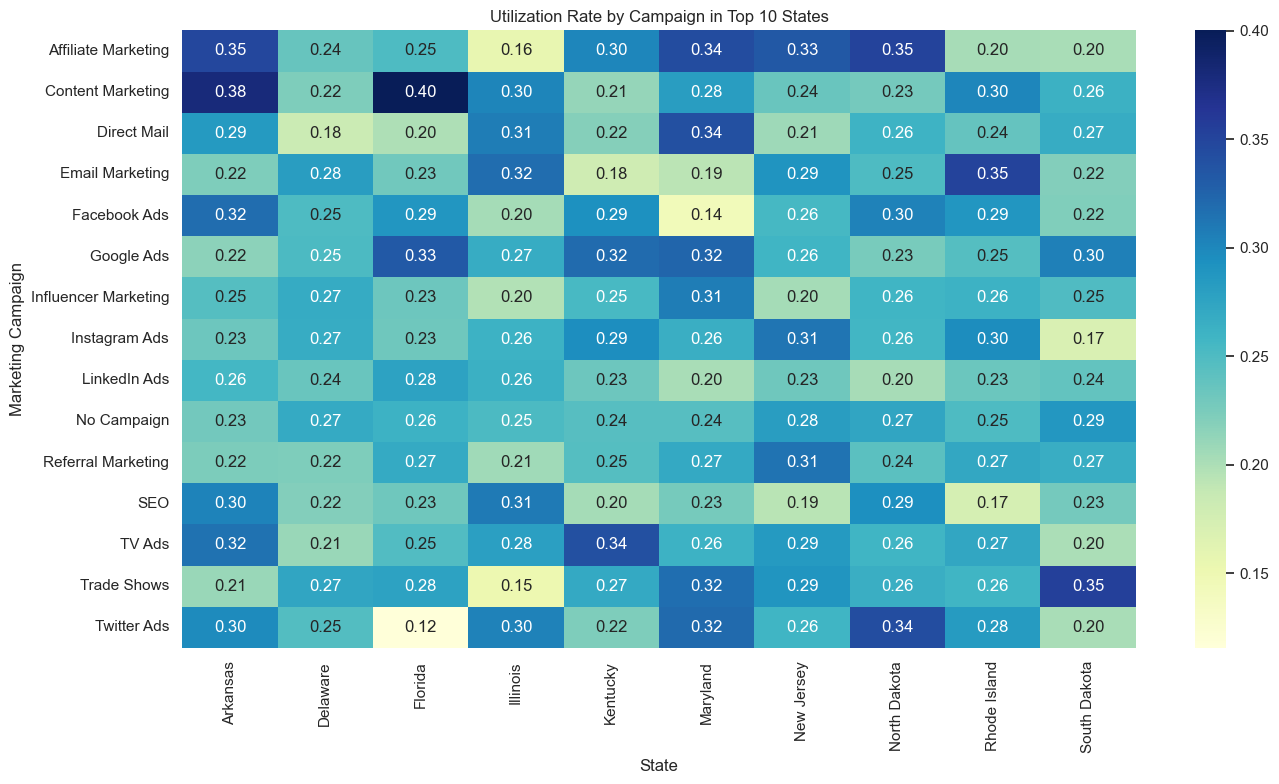

In [ ]:

heatmap_data = state_campaign_perf.pivot_table(
    index='name',
    columns='state',
    values='utilization_rate',
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Utilization Rate by Campaign in Top 10 States')
plt.xlabel('State')
plt.ylabel('Marketing Campaign')
plt.tight_layout()
plt.show()


#### 🗺️ Inference for Task 5: Utilization Rate by Campaign in Top 10 States

- The heatmap reveals **notable variation in utilization performance** across marketing campaigns and states, indicating that **marketing effectiveness is region-specific**.
- **Content Marketing** shows strong performance in **Arkansas (0.38)** and **Florida (0.40)**, suggesting these are high-engagement regions for content-driven campaigns.
- **Email Marketing** achieved peak utilization in **Rhode Island (0.35)**, while remaining below 0.25 in most other states, indicating it may be **most effective when targeted locally**.
- **Trade Shows**, typically a high-touch channel, performed best in **South Dakota (0.35)** and **Maryland (0.32)**, reinforcing their value in smaller or high-conversion markets.
- Campaigns like **TV Ads**, **SEO**, and **Twitter Ads** maintain relatively stable performance (~0.25–0.34) across multiple states, implying **broader regional consistency**.
- In contrast, **Direct Mail** and **Facebook Ads** show sharp drops in states like **Delaware, Florida, and Maryland**, indicating **lower post-approval engagement** despite possible exposure.

#### ✅ Business Takeaways:
- 📌 Focus campaign strategy on **state-specific strengths** — scale what works best per region (e.g., Content in FL/AR, Email in RI).
- 🔁 Reevaluate or test new approaches for underperforming campaigns in specific states (e.g., Facebook in MD, Direct Mail in FL).
- 🧠 Use this heatmap to inform **region-specific marketing allocations** and refine how each channel is deployed across territories.
- 📈 Campaigns with **balanced performance across all states** (e.g., SEO, LinkedIn, TV Ads) are strong candidates for **national scaling** with minor localization.

